<a href="https://colab.research.google.com/github/rrfsantos/Projeto-Redes-Neurais-OCT-Images/blob/main/OCT2017_Xception_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
import itertools
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
reports = glob('/content/drive/MyDrive/TCC/oct_kfolds/kfold*_classification_report.csv')
reports =  sorted(reports)

In [4]:
df = pd.DataFrame()
acc = []
for i in range(len(reports)):
    k = i + 1
    d = pd.read_csv(reports[i]).T
    new_header = d.iloc[0]
    d = d[1:]
    d.columns = new_header
    acc.append(list(np.unique(d.accuracy.astype(float))))
    d.set_axis(['precision', 'recall', 'f1-score', 'support'], axis=0, inplace=True)
    df = df.append(d) 
df['metrica'] = df.index    

### Acurária para cada Kfold

In [5]:
acc = list(itertools.chain.from_iterable(acc))
kfolds = [1,2,3,4,5]
df_accuracy = pd.DataFrame({'kfolds': kfolds,'accuracy %': acc })

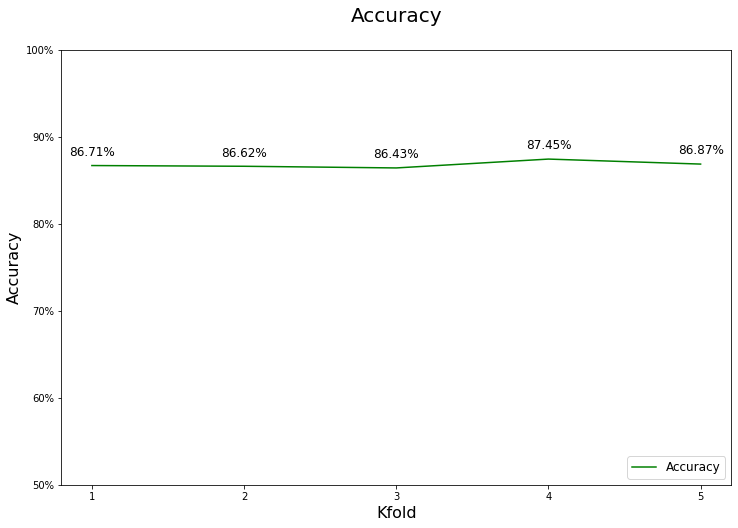

In [6]:
figure(figsize=(12, 8))
ax = plt.axes()
ax.plot(kfolds, acc, label='Accuracy', color='g')
for x,y in zip(kfolds,acc):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

plt.xticks(kfolds)
plt.ylim(0.5,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

plt.legend(loc='lower right', fontsize = 12)
plt.xlabel('Kfold', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy\n', fontsize = 20)
plt.show();

### Precisão para cada Kfold

In [7]:
df_precision = df[df['metrica']=='precision']

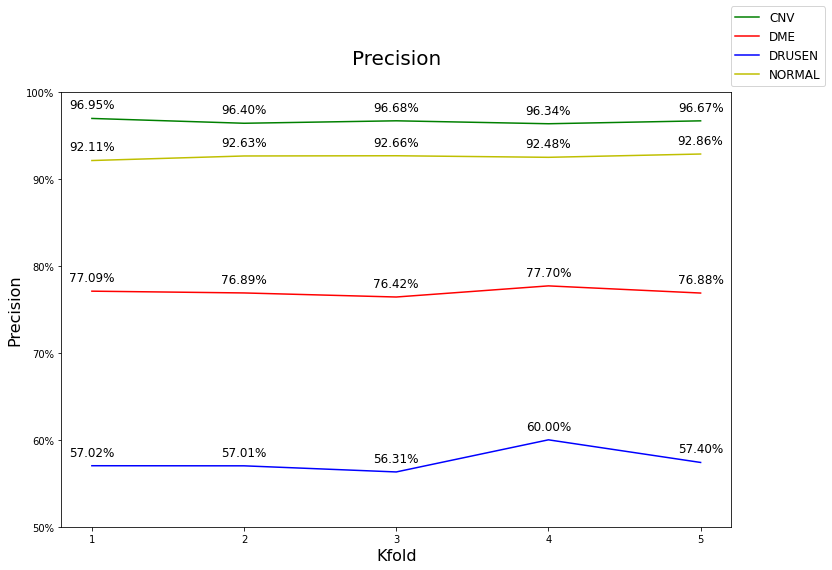

In [8]:
cnv = df_precision['CNV']
dme = df_precision['DME']
drusen = df_precision['DRUSEN']
normal = df_precision['NORMAL']

figure(figsize=(12, 8))

ax = plt.axes()

ax.plot(kfolds, cnv, label='CNV', color='g')
for x,y in zip(kfolds,cnv):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12) 

ax.plot(kfolds, dme, label='DME', color='r')
for x,y in zip(kfolds,dme):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

ax.plot(kfolds, drusen, label='DRUSEN', color='b')
for x,y in zip(kfolds,drusen):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

ax.plot(kfolds, normal, label='NORMAL', color='y')
for x,y in zip(kfolds,normal):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
    
plt.xticks(kfolds)
plt.ylim(0.5,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1), fontsize=12)
plt.xlabel('Kfold', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.title('Precision\n', fontsize = 20)
plt.show();

### Recall para cada Kfold

In [9]:
df_recall = df[df['metrica']=='recall']

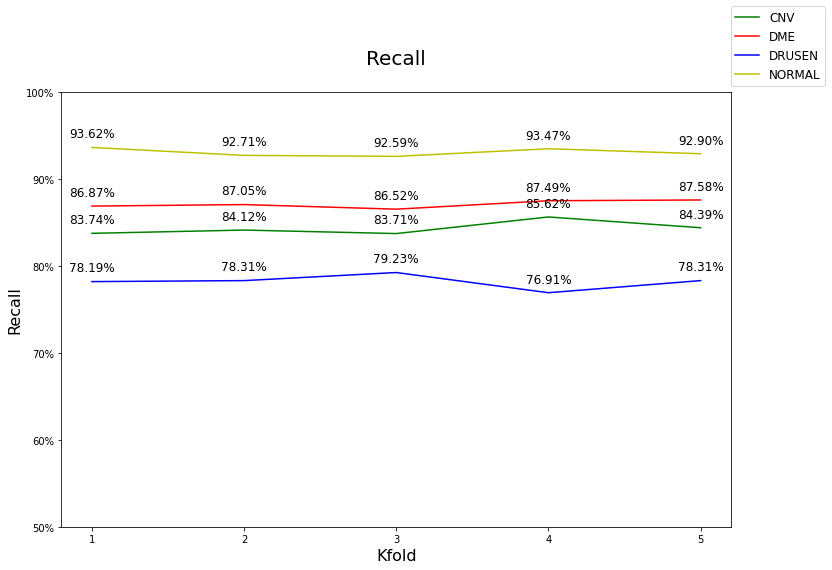

In [10]:
cnv = df_recall['CNV']
dme = df_recall['DME']
drusen = df_recall['DRUSEN']
normal = df_recall['NORMAL']

figure(figsize=(12, 8))

ax = plt.axes()

ax.plot(kfolds, cnv, label='CNV', color='g')
for x,y in zip(kfolds,cnv):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12) 

ax.plot(kfolds, dme, label='DME', color='r')
for x,y in zip(kfolds,dme):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

ax.plot(kfolds, drusen, label='DRUSEN', color='b')
for x,y in zip(kfolds,drusen):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

ax.plot(kfolds, normal, label='NORMAL', color='y')
for x,y in zip(kfolds,normal):
    label = "{:.2%}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
    
plt.xticks(kfolds)
plt.ylim(0.5,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1), fontsize=12)
plt.xlabel('Kfold', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.title('Recall\n', fontsize = 20)
plt.show();